<a href="https://colab.research.google.com/github/gharashim/DL/blob/main/1d_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# ÏãúÎìú ÏÑ§Ï†ï (Ïû¨ÌòÑ Í∞ÄÎä•Ìïú Í≤∞Í≥ºÎ•º ÏúÑÌï¥)
np.random.seed(42)

def generate_fourier_regression_data(n_samples=1000,
                                     x_range=(-2*np.pi, 2*np.pi),
                                     n_harmonics=5,
                                     noise_level=0.3):
    """
    Ìë∏Î¶¨Ïóê Í∏âÏàò Í∏∞Î∞òÏùò ÌöåÍ∑Ä Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

    Parameters:
    - n_samples: ÏÉùÏÑ±Ìï† Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ Ïàò
    - x_range: xÍ∞íÏùò Î≤îÏúÑ (tuple)
    - n_harmonics: ÏÇ¨Ïö©Ìï† Ï°∞ÌôîÌåå(harmonics)Ïùò Ïàò
    - noise_level: ÎÖ∏Ïù¥Ï¶à Í∞ïÎèÑ

    Returns:
    - X: ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ (n_samples, 1)
    - y: Ï∂úÎ†• Îç∞Ïù¥ÌÑ∞ (n_samples,)
    """

    # x Í∞í ÏÉùÏÑ± (Í∑†Îì± Î∂ÑÌè¨ + ÏïΩÍ∞ÑÏùò ÎûúÎç§ÏÑ±)
    x_min, x_max = x_range
    X = np.random.uniform(x_min, x_max, n_samples)
    X = np.sort(X)  # ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ Ï†ïÎ†¨

    # Ìë∏Î¶¨Ïóê Í∏âÏàò Í≥ÑÏàò (Í∞Å Ï°∞ÌôîÌååÏóê ÎåÄÌïú Í∞ÄÏ§ëÏπò)
    # ÏùºÎ∞òÏ†ÅÏúºÎ°ú Í≥†Ï∞® Ï°∞ÌôîÌååÏùºÏàòÎ°ù Í≥ÑÏàòÍ∞Ä ÏûëÏïÑÏßê
    a0 = 2.0  # DC ÏÑ±Î∂Ñ

    # sin Í≥ÑÏàòÎì§ (ÎûúÎç§ÌïòÍ≤å ÏÉùÏÑ±ÌïòÎêò, Í≥†Ï∞®ÏùºÏàòÎ°ù ÏûëÍ≤å)
    a_coeffs = np.random.normal(0, 1, n_harmonics) / np.arange(1, n_harmonics+1)

    # cos Í≥ÑÏàòÎì§ (ÎûúÎç§ÌïòÍ≤å ÏÉùÏÑ±ÌïòÎêò, Í≥†Ï∞®ÏùºÏàòÎ°ù ÏûëÍ≤å)
    b_coeffs = np.random.normal(0, 1, n_harmonics) / np.arange(1, n_harmonics+1)

    # Ìë∏Î¶¨Ïóê Í∏âÏàò Í≥ÑÏÇ∞
    y = np.ones_like(X) * a0/2  # DC ÏÑ±Î∂Ñ

    for n in range(1, n_harmonics+1):
        # nÎ≤àÏß∏ Ï°∞ÌôîÌåå Ï∂îÍ∞Ä
        y += a_coeffs[n-1] * np.cos(n * X) + b_coeffs[n-1] * np.sin(n * X)

    # ÎûúÎç§ ÎÖ∏Ïù¥Ï¶à Ï∂îÍ∞Ä
    noise = np.random.normal(0, noise_level * np.std(y), n_samples)
    y += noise

    # XÎ•º 2Ï∞®Ïõê Î∞∞Ïó¥Î°ú Î≥ÄÌôò (sklearn Ìò∏ÌôòÏÑ±ÏùÑ ÏúÑÌï¥)
    X = X.reshape(-1, 1)

    return X, y, a0, a_coeffs, b_coeffs

def visualize_fourier_regression(X, y, X_train, y_train, X_test, y_test, a0, a_coeffs, b_coeffs):
    """
    ÏãúÍ≥ÑÏó¥ ÌöåÍ∑Ä Îç∞Ïù¥ÌÑ∞ÏôÄ Ìë∏Î¶¨Ïóê Í≥ÑÏàòÎ•º ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®Ïàò

    Parameters:
        X (np.ndarray): Ï†ÑÏ≤¥ ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ (1D or 2D)
        y (np.ndarray): Ï†ÑÏ≤¥ ÌÉÄÍπÉ Îç∞Ïù¥ÌÑ∞
        X_train (np.ndarray): ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏûÖÎ†•
        y_train (np.ndarray): ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÉÄÍπÉ
        X_test (np.ndarray): ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏûÖÎ†•
        y_test (np.ndarray): ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÉÄÍπÉ
        a0 (float): Ìë∏Î¶¨Ïóê Í≥ÑÏàò a0
        a_coeffs (list or np.ndarray): ÏΩîÏÇ¨Ïù∏ Í≥ÑÏàòÎì§ (a1, a2, ..., an)
        b_coeffs (list or np.ndarray): ÏÇ¨Ïù∏ Í≥ÑÏàòÎì§ (b1, b2, ..., bn)
    """
    plt.figure(figsize=(15, 10))

    # ÏõêÎ≥∏ Ìï®Ïàò (ÎÖ∏Ïù¥Ï¶à ÏóÜÏù¥) Í≥ÑÏÇ∞
    x_smooth = np.linspace(X.min(), X.max(), 1000)
    y_true = np.ones_like(x_smooth) * a0 / 2
    for n in range(1, len(a_coeffs) + 1):
        y_true += a_coeffs[n-1] * np.cos(n * x_smooth) + b_coeffs[n-1] * np.sin(n * x_smooth)

    # ÏÑúÎ∏åÌîåÎ°Ø 1: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞
    plt.subplot(2, 2, 1)
    plt.scatter(X_train.flatten(), y_train, alpha=0.6, s=20, c='blue', label='Train Data')
    plt.scatter(X_test.flatten(), y_test, alpha=0.6, s=20, c='red', label='Test Data')
    plt.plot(x_smooth, y_true, 'g--', linewidth=2, label='True Function (No Noise)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Generated Regression Data (All)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # ÏÑúÎ∏åÌîåÎ°Ø 2: Í∞úÎ≥Ñ Ï°∞ÌôîÌåå ÏÑ±Î∂ÑÎì§
    plt.subplot(2, 2, 2)
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    for n in range(1, min(len(a_coeffs)+1, 6)):
        harmonic = a_coeffs[n-1] * np.cos(n * x_smooth) + b_coeffs[n-1] * np.sin(n * x_smooth)
        plt.plot(x_smooth, harmonic, '--', color=colors[n-1], alpha=0.7, label=f'Harmonic {n}')
    plt.xlabel('x')
    plt.ylabel('Amplitude')
    plt.title('Individual Fourier Harmonics')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # ÏÑúÎ∏åÌîåÎ°Ø 3: ÎÖ∏Ïù¥Ï¶à Î∂ÑÏÑù
    plt.subplot(2, 2, 3)
    noise = y - (np.ones_like(X.flatten()) * a0 / 2)
    for n in range(1, len(a_coeffs)+1):
        noise -= a_coeffs[n-1] * np.cos(n * X.flatten()) + b_coeffs[n-1] * np.sin(n * X.flatten())
    plt.hist(noise, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel('Noise Value')
    plt.ylabel('Frequency')
    plt.title('Random Noise Distribution')
    plt.grid(True, alpha=0.3)

    # ÏÑúÎ∏åÌîåÎ°Ø 4: Ïä§ÌéôÌä∏Îüº Î∂ÑÏÑù (FFT)
    plt.subplot(2, 2, 4)
    x_uniform = np.linspace(X.min(), X.max(), len(X))
    y_interp = np.interp(x_uniform, X.flatten(), y)
    fft_vals = np.fft.fft(y_interp)
    freqs = np.fft.fftfreq(len(y_interp), x_uniform[1] - x_uniform[0])
    pos_mask = freqs > 0
    plt.plot(freqs[pos_mask], np.abs(fft_vals[pos_mask]))
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.title('Frequency Spectrum (FFT)')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


Ìë∏Î¶¨Ïóê Í∏âÏàò Í∏∞Î∞ò ÌöåÍ∑Ä Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± Ï§ë...
ÏÉùÏÑ±Îêú Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú:
X shape: (10, 1)
y shape: (10,)
X Î≤îÏúÑ: [0.06, 1.00]
y Î≤îÏúÑ: [0.48, 1.87]

ÏÇ¨Ïö©Îêú Ìë∏Î¶¨Ïóê Í≥ÑÏàò:
a0 (DC): 2.000
cos Í≥ÑÏàò: [-0.45006547  0.31142497 -0.35587348 -0.03559487  0.02405913  0.08573981
  0.10165927 -0.14058026 -0.17045713  0.12776768]
sin Í≥ÑÏàò: [ 0.33231401 -0.37424327  0.51705066  0.02891866  0.23585944  0.01125308
  0.29439256  0.21941761 -0.02766268  0.0971571 ]

Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†:
ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 8 ÏÉòÌîå
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: 2 ÏÉòÌîå


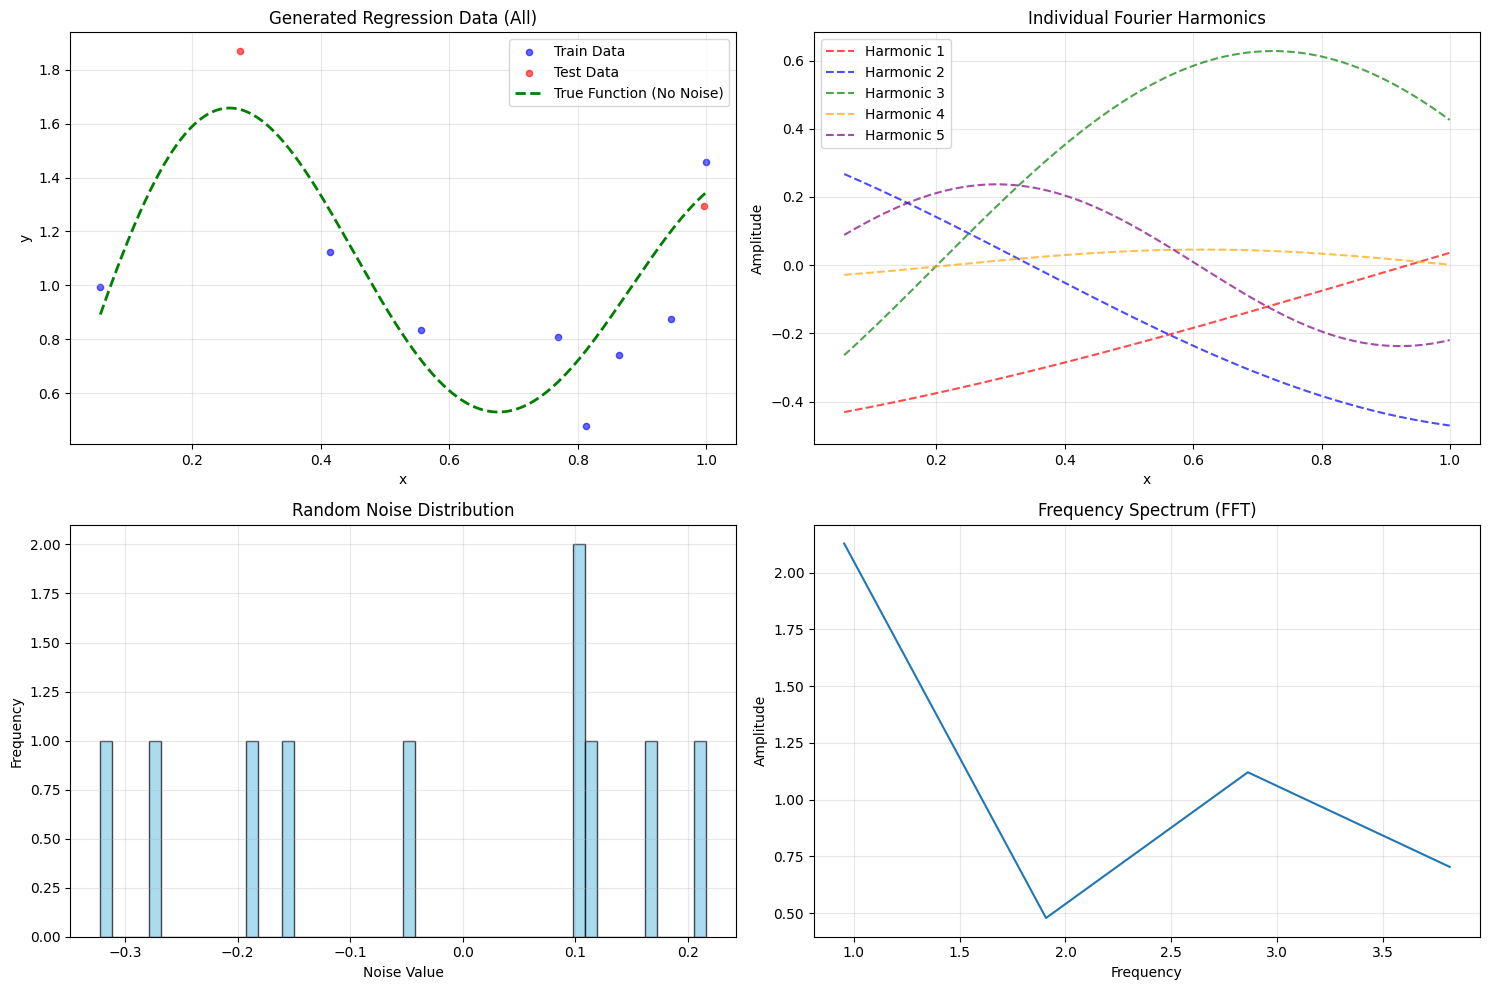

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
print("Ìë∏Î¶¨Ïóê Í∏âÏàò Í∏∞Î∞ò ÌöåÍ∑Ä Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± Ï§ë...")
X, y, a0, a_coeffs, b_coeffs = generate_fourier_regression_data(
    n_samples=10,
    # x_range=(-3*np.pi, 3*np.pi),
    x_range=(0, 1),
    n_harmonics=10,
    noise_level=0.5
)

print(f"ÏÉùÏÑ±Îêú Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X Î≤îÏúÑ: [{X.min():.2f}, {X.max():.2f}]")
print(f"y Î≤îÏúÑ: [{y.min():.2f}, {y.max():.2f}]")

# Ìë∏Î¶¨Ïóê Í≥ÑÏàò Ï∂úÎ†•
print(f"\nÏÇ¨Ïö©Îêú Ìë∏Î¶¨Ïóê Í≥ÑÏàò:")
print(f"a0 (DC): {a0:.3f}")
print(f"cos Í≥ÑÏàò: {a_coeffs}")
print(f"sin Í≥ÑÏàò: {b_coeffs}")

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nÎç∞Ïù¥ÌÑ∞ Î∂ÑÌï†:")
print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: {X_train.shape[0]} ÏÉòÌîå")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞: {X_test.shape[0]} ÏÉòÌîå")

visualize_fourier_regression(X, y, X_train, y_train, X_test, y_test, a0, a_coeffs, b_coeffs)


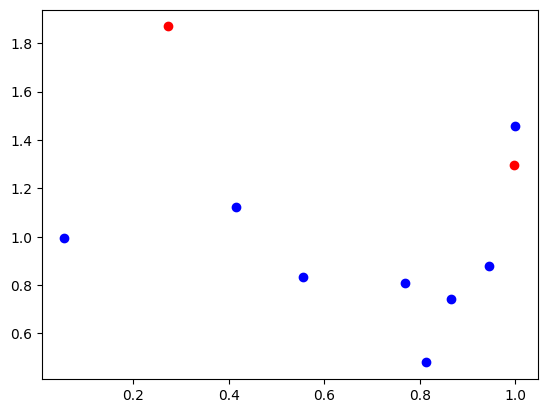

In [ ]:
plt.scatter(x = X_train, y = y_train, color = 'blue')
plt.scatter(x = X_test, y = y_test, color = 'red')

R¬≤ Scores (each fold): [0.74458833 0.86265452 0.69609199 0.43830438 0.71927435]
Mean R¬≤ Score: 0.6922
MSE (CV-based): 0.1259


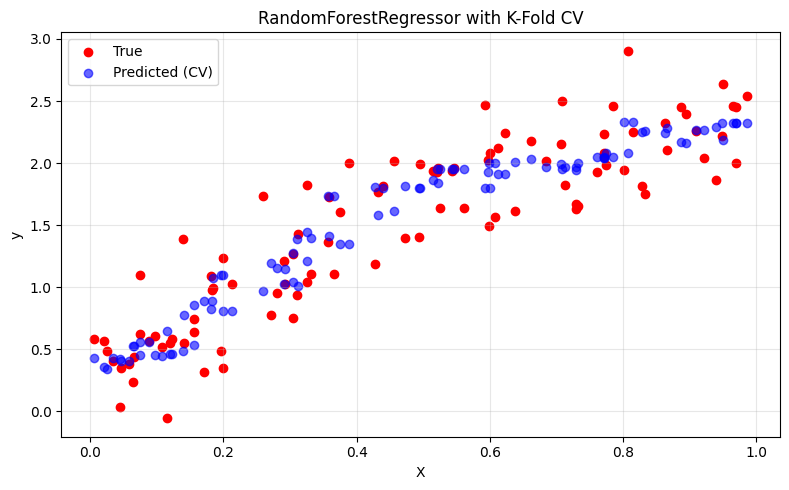

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# Î™®Îç∏Îì§ import
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# 2. Î™®Îç∏ ÏÑ†ÌÉù (ÌïòÎÇòÎßå Ï£ºÏÑù Ìï¥Ï†ú)
# model = LinearRegression()
model = RandomForestRegressor(n_estimators=50, max_depth=3, random_state=42)
# model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
# model = XGBRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)

# 3. K-Fold ÍµêÏ∞®Í≤ÄÏ¶ù ÏÑ§Ï†ï
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. R¬≤ Ï†êÏàò ÌèâÍ∞Ä
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print(f"R¬≤ Scores (each fold): {r2_scores}")
print(f"Mean R¬≤ Score: {np.mean(r2_scores):.4f}")

# 5. ÏòàÏ∏°Í∞í ÏÉùÏÑ± (CV Í∏∞Î∞ò)
y_pred_cv = cross_val_predict(model, X, y, cv=kf)

# 6. Ï†ÑÏ≤¥ MSE ÌèâÍ∞Ä
mse = mean_squared_error(y, y_pred_cv)
print(f"MSE (CV-based): {mse:.4f}")

# 7. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='red', label='True')
plt.scatter(X, y_pred_cv, color='blue', alpha=0.6, label='Predicted (CV)')
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"{model.__class__.__name__} with K-Fold CV")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# 2. PyTorch ÌÖêÏÑúÎ°ú Î≥ÄÌôò (Conv1dÏö© reshape)
X = X.reshape(-1, 1, 1)           # (batch, channel, length)
y = y.reshape(-1, 1)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# 3. Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
# X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

all_preds = []
all_true = []


# 4. Î™®Îç∏ Ï†ïÏùò (2 Conv1d layers + Flatten + Linear)
class MLPRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

for fold, (train_idx, test_idx) in enumerate(kfold.split(X_tensor)):
    print(f"üåÄ Fold {fold+1}")

    # Fold Î≥Ñ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
    X_train_fold = X_tensor[train_idx]
    y_train_fold = y_tensor[train_idx]
    X_test_fold = X_tensor[test_idx]
    y_test_fold = y_tensor[test_idx]

    # Î™®Îç∏ Ï¥àÍ∏∞Ìôî (FoldÎßàÎã§ ÏÉàÎ°ú ÏÉùÏÑ±!)
    model = MLPRegressor()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # ÌïôÏäµ
    for epoch in range(100):
        model.train()
        optimizer.zero_grad()
        output = model(X_train_fold)
        loss = criterion(output, y_train_fold)
        loss.backward()
        optimizer.step()

    # ÏòàÏ∏°
    model.eval()
    with torch.no_grad():
        preds = model(X_test_fold).numpy()
        true_vals = y_test_fold.numpy()

    all_preds.append(preds)
    all_true.append(true_vals)

# Ï†ÑÏ≤¥ Í≤∞Í≥º ÌèâÍ∞Ä
y_pred_cv = np.vstack(all_preds)
y_true_cv = np.vstack(all_true)

mse_cv = mean_squared_error(y_true_cv, y_pred_cv)
r2_cv = r2_score(y_true_cv, y_pred_cv)
print(f"\nüìä Cross-Validated MSE: {mse_cv:.4f}")
print(f"üìà Cross-Validated R¬≤: {r2_cv:.4f}")


üåÄ Fold 1


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([80, 1])) that is different to the input size (torch.Size([80, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


üåÄ Fold 2
üåÄ Fold 3
üåÄ Fold 4
üåÄ Fold 5


ValueError: Found array with dim 3. None expected <= 2.

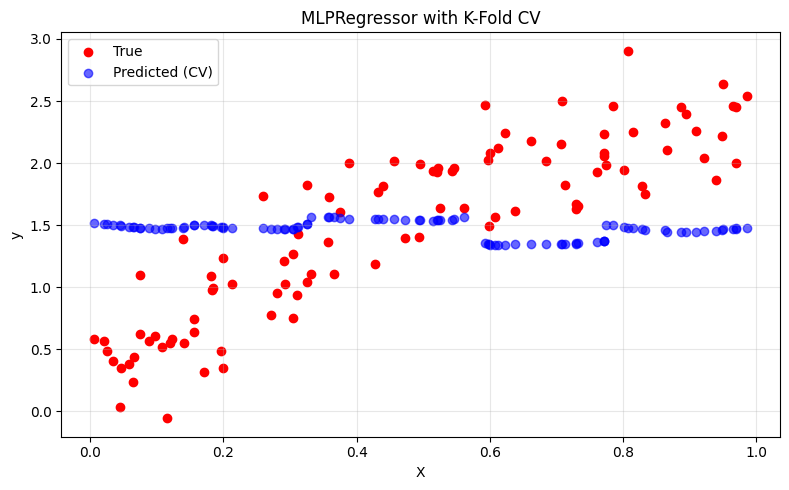

In [ ]:
# 7. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='red', label='True')
plt.scatter(X, y_pred_cv, color='blue', alpha=0.6, label='Predicted (CV)')
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"{model.__class__.__name__} with K-Fold CV")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎî©
# data = fetch_california_housing()
# X = data.data
# y = data.target

# 2. Ï†ïÍ∑úÌôî
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()
# X_scaled = scaler_X.fit_transform(X)
# y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# 3. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y_scaled, test_size=0.2, random_state=42
# )

# 4. ÌÖêÏÑú Î≥ÄÌôò
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# 5. Î™®Îç∏ Ï†ïÏùò
class MLPRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

model = MLPRegressor()

# 6. ÌïôÏäµ ÏÑ§Ï†ï
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 7. ÌïôÏäµ Î£®ÌîÑ
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# 8. ÏòàÏ∏°
model.eval()
with torch.no_grad():
    y_pred_scaled = model(X_test_tensor).numpy()
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test_tensor.numpy())

# 9. ÌèâÍ∞Ä
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print(f"\n‚úÖ Test MSE: {mse:.4f}")
print(f"‚úÖ Test R¬≤ Score: {r2:.4f}")

# 10. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))

# (1) ÏòàÏ∏° vs Ïã§Ï†ú ÏÇ∞Ï†êÎèÑ
plt.subplot(1, 2, 1)
plt.scatter(y_true, y_pred, alpha=0.5, color='blue')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")

# (2) ÏûîÏ∞® Î∂ÑÌè¨
plt.subplot(1, 2, 2)
residuals = y_true - y_pred
plt.hist(residuals, bins=40, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")

plt.tight_layout()
plt.show()


RuntimeError: mat1 and mat2 shapes cannot be multiplied (80x1 and 8x64)

In [ ]:
def visualize(y_true, y_pred):
    # ÌèâÍ∞Ä
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n‚úÖ Test MSE: {mse:.4f}")
    print(f"‚úÖ Test R¬≤ Score: {r2:.4f}")

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 5))

    # ÏòàÏ∏° vs Ïã§Ï†ú ÏÇ∞Ï†êÎèÑ
    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, alpha=0.5, color='blue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual vs Predicted")

    # ÏûîÏ∞® Î∂ÑÌè¨
    plt.subplot(1, 2, 2)
    residuals = y_true - y_pred
    plt.hist(residuals, bins=40, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Residual Distribution")

    plt.tight_layout()
    plt.show()

Epoch 20/1000, Loss: 0.0920
Epoch 40/1000, Loss: 0.0742
Epoch 60/1000, Loss: 0.0732
Epoch 80/1000, Loss: 0.0727
Epoch 100/1000, Loss: 0.0727
Epoch 120/1000, Loss: 0.0727
Epoch 140/1000, Loss: 0.0727
Epoch 160/1000, Loss: 0.0727
Epoch 180/1000, Loss: 0.0727
Epoch 200/1000, Loss: 0.0727
Epoch 220/1000, Loss: 0.0727
Epoch 240/1000, Loss: 0.0727
Epoch 260/1000, Loss: 0.0726
Epoch 280/1000, Loss: 0.0726
Epoch 300/1000, Loss: 0.0726
Epoch 320/1000, Loss: 0.0726
Epoch 340/1000, Loss: 0.0726
Epoch 360/1000, Loss: 0.0725
Epoch 380/1000, Loss: 0.0724
Epoch 400/1000, Loss: 0.0723
Epoch 420/1000, Loss: 0.0721
Epoch 440/1000, Loss: 0.0718
Epoch 460/1000, Loss: 0.0712
Epoch 480/1000, Loss: 0.0704
Epoch 500/1000, Loss: 0.0693
Epoch 520/1000, Loss: 0.0679
Epoch 540/1000, Loss: 0.0662
Epoch 560/1000, Loss: 0.0639
Epoch 580/1000, Loss: 0.0597
Epoch 600/1000, Loss: 0.0516
Epoch 620/1000, Loss: 0.0378
Epoch 640/1000, Loss: 0.0255
Epoch 660/1000, Loss: 0.0196
Epoch 680/1000, Loss: 0.0176
Epoch 700/1000, Lo

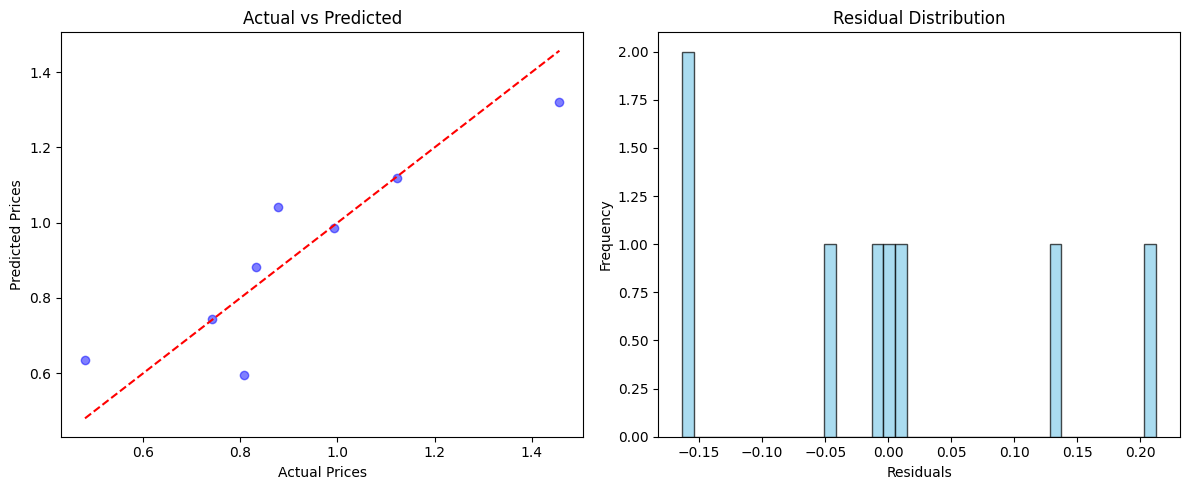

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# # 2. Ï†ïÍ∑úÌôî
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()
# X_scaled = scaler_X.fit_transform(X)
# y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# # 3. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y_scaled, test_size=0.2, random_state=42
# )

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


# 5. Î™®Îç∏ Ï†ïÏùò
class MLPRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

class ConvMLPRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_channels=1, out_channels=2, kernel_size=3, padding=1),  # ÏûÖÎ†• 1Ï±ÑÎÑê, Ï∂úÎ†• 8Ï±ÑÎÑê
            nn.BatchNorm1d(2),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        self.flatten = nn.Flatten()  # (B, 8, L) ‚Üí (B, 8*L)

        self.mlp = nn.Sequential(
            nn.Linear(2 * 1, 8),   # 1ÏùÄ Conv1d Ï∂úÎ†• Í∏∏Ïù¥. Í≥†Ï†ï Í∏∏Ïù¥Ïù∏ Í≤ΩÏö∞ ÏàòÏ†ï Í∞ÄÎä•
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Dropout(0.5),
            # nn.Linear(64, 64),
            # nn.ReLU(),
            # nn.Dropout(0.5),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        # x: (B, 1) ‚Üí (B, 1, 1)
        x = x.view(x.size(0), 1, -1)      # Ï±ÑÎÑê Ï∞®Ïõê Ï∂îÍ∞Ä: (B, 1, length)
        x = self.conv(x)                 # (B, 8, L)
        x = self.flatten(x)              # (B, 8 * L)
        x = self.mlp(x)
        return x

class LSTMRegressor(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=10, dropout=0.1):
        super().__init__()

        # LSTM Î†àÏù¥Ïñ¥
        self.lstm = nn.LSTM(
            input_size=input_size,      # ÏûÖÎ†• ÌîºÏ≤ò Ïàò
            hidden_size=hidden_size,    # ÌûàÎì† Ïú†Îãõ Ïàò
            num_layers=num_layers,      # LSTM Î†àÏù¥Ïñ¥ Ïàò
            dropout=dropout if num_layers > 1 else 0,  # ÎìúÎ°≠ÏïÑÏõÉ (Î†àÏù¥Ïñ¥Í∞Ä 2Í∞ú Ïù¥ÏÉÅÏùº ÎïåÎßå)
            batch_first=True           # (batch, seq, feature) ÏàúÏÑú
        )

        # Ï∂úÎ†• Î†àÏù¥Ïñ¥
        self.mlp = nn.Sequential(
            nn.Linear(hidden_size, 16),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        # x: (batch_size, sequence_length) ‚Üí (batch_size, sequence_length, 1)
        if x.dim() == 2:
            x = x.unsqueeze(-1)

        # LSTM ÌÜµÍ≥º
        lstm_out, (hidden, cell) = self.lstm(x)

        # ÎßàÏßÄÎßâ ÌÉÄÏûÑÏä§ÌÖùÏùò Ï∂úÎ†• ÏÇ¨Ïö©
        last_output = lstm_out[:, -1, :]  # (batch_size, hidden_size)

        # MLP ÌÜµÍ≥º
        output = self.mlp(last_output)

        return output


# Îã®Ïàú RNN Î™®Îç∏
class SmoothingRNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=64, batch_first=True)
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(-1)  # ÏûêÎèô Ï∞®Ïõê ÎßûÏ∂§

        out, _ = self.rnn(x)  # out: (B, T, H)
        out = self.fc(out[:, -1, :])  # ÎßàÏßÄÎßâ ÏãúÏ†êÏùò ÏùÄÎãâÍ∞í
        return out

model = SmoothingRNN()

# model = MLPRegressor()
# model = ConvMLPRegressor()

# Î™®Îç∏ Ï¥àÍ∏∞Ìôî
# model = LSTMRegressor(input_size=1, hidden_size=32, num_layers=2)

# 6. ÌïôÏäµ ÏÑ§Ï†ï
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 7. ÌïôÏäµ Î£®ÌîÑ
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# 8. ÏòàÏ∏°
model.eval()
with torch.no_grad():
    y_pred = model(X_train_tensor).numpy().reshape(-1)
    y_true = y_train_tensor.numpy().reshape(-1)
    # y_pred = scaler_y.inverse_transform(y_pred_scaled)
    # y_true = scaler_y.inverse_transform(y_test_tensor.numpy())

visualize(y_true, y_pred)

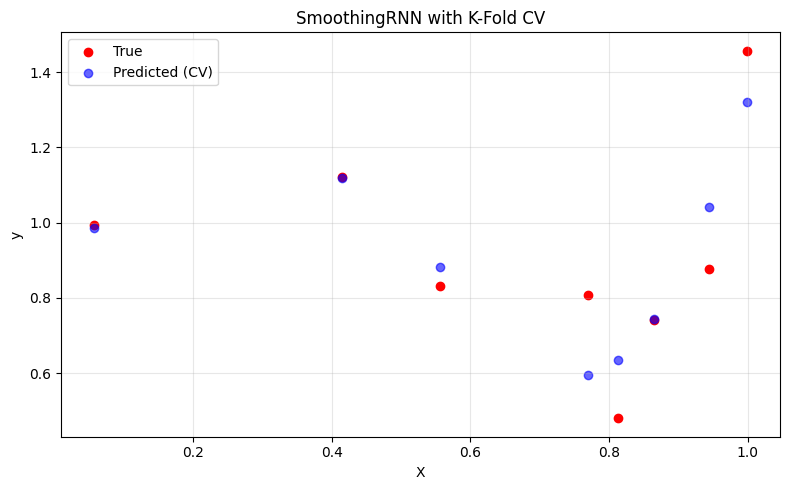

In [ ]:
# 7. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='red', label='True')
plt.scatter(X_train, y_pred, color='blue', alpha=0.6, label='Predicted (CV)')
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"{model.__class__.__name__} with K-Fold CV")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
